In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
# === Load dataset ===
df = pd.read_csv("Combined_TimeBasedFeatures_Dataset.csv") 

In [3]:
df.head()

,max_fiat,total_fiat,mean_fiat,total_biat,min_flowiat,max_idle,max_biat,min_biat,std_active,max_flowiat,...,class1,mean_active,flowBytesPerSecond,flowPktsPerSecond,duration,min_fiat,std_flowiat,min_active,std_idle,min_idle
0,960168.806452,959557.0,413.298110,958222.0,38638.0,-1.0,960184.290323,962410.0,0.0,922031.0,...,VPN,0.0,300.626219,2.147330,29804453.0,960888.0,444542.390308,-1.0,0.0,-1.0
1,960139.935484,959370.0,441.343890,958686.0,38692.0,-1.0,960143.741935,961156.0,0.0,922395.0,...,VPN,0.0,300.638656,2.147419,29803220.0,961092.0,444615.340569,-1.0,0.0,-1.0
2,62013.879668,66.0,97377.826871,26.0,8.0,1150236.0,25609.464716,1199985.0,0.0,1150236.0,...,VPN,5417214.0,56918.592378,55.134224,14945345.0,1150827.0,56287.888168,5417214.0,0.0,1150236.0
3,1436.000000,1436.0,0.000000,-1.0,1436.0,-1.0,0.000000,-1.0,0.0,1436.0,...,VPN,0.0,72423.398329,1392.757660,1436.0,1436.0,0.000000,-1.0,0.0,-1.0
4,110840.666667,2.0,157854.669307,220.0,2.0,-1.0,144054.571429,500019.0,0.0,496180.0,...,Non-VPN,0.0,4463.586220,17.850378,1008382.0,496233.0,124014.532801,-1.0,0.0,-1.0


In [4]:
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62711 entries, 0 to 62710
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   max_fiat            62711 non-null  float64
 1   total_fiat          62711 non-null  float64
 2   mean_fiat           62711 non-null  float64
 3   total_biat          62711 non-null  float64
 4   min_flowiat         62711 non-null  float64
 5   max_idle            62711 non-null  float64
 6   max_biat            62711 non-null  float64
 7   min_biat            62711 non-null  float64
 8   std_active          62711 non-null  float64
 9   max_flowiat         62711 non-null  float64
 10  mean_biat           62711 non-null  float64
 11  max_active          62711 non-null  float64
 12  mean_idle           62711 non-null  float64
 13  mean_flowiat        62711 non-null  float64
 14  class1              62711 non-null  object 
 15  mean_active         62711 non-null  fl

In [5]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
max_fiat              0
total_fiat            0
mean_fiat             0
total_biat            0
min_flowiat           0
max_idle              0
max_biat              0
min_biat              0
std_active            0
max_flowiat           0
mean_biat             0
max_active            0
mean_idle             0
mean_flowiat          0
class1                0
mean_active           0
flowBytesPerSecond    0
flowPktsPerSecond     0
duration              0
min_fiat              0
std_flowiat           0
min_active            0
std_idle              0
min_idle              0
dtype: int64


In [6]:
print("\nColumns with -1.0 (potential missing values):")
for col in df.columns:
    if (df[col] == -1.0).any():
        print(f"{col}: {(df[col] == -1.0).sum()} instances")



Columns with -1.0 (potential missing values):
total_fiat: 8428 instances
total_biat: 12370 instances
min_flowiat: 2216 instances
max_idle: 35133 instances
min_biat: 12370 instances
max_flowiat: 2020 instances
max_active: 35133 instances
min_fiat: 8428 instances
min_active: 35133 instances
min_idle: 35133 instances


In [7]:
# Replace -1.0 with NaN for easier handling
df.replace(-1.0, np.nan, inplace=True)

In [8]:
before_drop = df.columns

# Drop columns with <90% non-NA values
df.dropna(axis=1, thresh=len(df)*0.9, inplace=True)

# Get list of columns after dropping
after_drop = df.columns

# Find the dropped columns
dropped_columns = set(before_drop) - set(after_drop)

print("Dropped columns:", dropped_columns)

Dropped columns: {'min_biat', 'min_active', 'min_idle', 'total_biat', 'max_idle', 'total_fiat', 'max_active', 'min_fiat'}


In [9]:
# Impute missing values: use median for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [10]:
df.shape

(62711, 16)

In [11]:
le = LabelEncoder()
df['class1'] = le.fit_transform(df['class1'])  # VPN: 1, Non-VPN: 0

# Define features and target
X = df.drop('class1', axis=1)
y = df['class1']

In [12]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [13]:
X_scaled

,max_fiat,mean_fiat,min_flowiat,max_biat,std_active,max_flowiat,mean_biat,mean_idle,mean_flowiat,mean_active,flowBytesPerSecond,flowPktsPerSecond,duration,std_flowiat,std_idle
0,-0.140876,-0.245362,-0.053128,-0.133233,-0.243598,-0.310336,-0.307706,-0.320603,-0.155757,-0.342087,-0.053224,-0.126880,0.849897,-0.268318,-0.225631
1,-0.140882,-0.245356,-0.053091,-0.133243,-0.243598,-0.310313,-0.307781,-0.320603,-0.155765,-0.342087,-0.053224,-0.126880,0.849829,-0.268302,-0.225631
2,-0.340014,-0.226606,-0.079067,-0.375159,-0.243598,-0.296143,-0.286587,-0.246234,-0.336010,0.005755,-0.047371,-0.124420,0.032688,-0.354253,-0.225631
3,-0.353445,-0.245442,-0.078108,-0.381788,-0.243598,-0.367593,-0.307950,-0.320603,-0.342636,-0.342087,-0.045768,-0.062320,-0.789186,-0.366711,-0.225631
4,-0.329188,-0.214908,-0.079071,-0.344498,-0.243598,-0.336822,-0.256158,-0.320603,-0.319703,-0.342087,-0.052794,-0.126151,-0.733806,-0.339262,-0.225631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62706,-0.353763,-0.245442,0.049538,-0.381788,-0.243598,-0.355770,-0.307950,-0.320603,-0.267314,-0.342087,-0.053005,-0.126494,-0.778731,-0.366711,-0.225631
62707,-0.353763,-0.245442,0.298829,-0.381788,-0.243598,-0.332679,-0.307950,-0.320603,-0.120211,-0.342087,-0.053169,-0.126814,-0.758312,-0.366711,-0.225631
62708,-0.353763,-0.245442,0.036734,-0.381788,-0.243598,-0.356956,-0.307950,-0.320603,-0.274870,-0.342087,-0.053204,-0.126441,-0.779779,-0.366711,-0.225631
62709,-0.272760,0.020472,-0.079068,-0.304239,0.217522,0.079435,0.072540,0.081137,-0.278694,0.085031,-0.053139,-0.126691,0.034538,-0.161958,0.151868


In [14]:
print("\ Class distribution (VPN vs Non-VPN):")
print(df['class1'].value_counts())

\ Class distribution (VPN vs Non-VPN):
1    32995
0    29716
Name: class1, dtype: int64


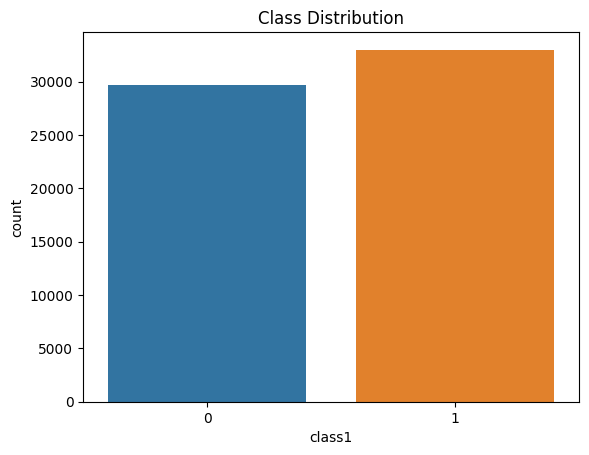

In [15]:
sns.countplot(x='class1', data=df)
plt.title("Class Distribution")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
accuracy = model.score(X_test, y_test)
print(f"\nModel Accuracy on Test Set: {accuracy:.4f}")


Model Accuracy on Test Set: 0.9681


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# --- GridSearchCV for RandomForest ---
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# --- Train and evaluate other models ---
models = {
    "Random Forest": best_rf,
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

print("=== Model Comparison ===")
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = acc

=== Model Comparison ===

Random Forest Accuracy: 0.9682
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5957
           1       0.96      0.99      0.97      6586

    accuracy                           0.97     12543
   macro avg       0.97      0.97      0.97     12543
weighted avg       0.97      0.97      0.97     12543



C:\Users\Moataz\anaconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [01:27:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.9303
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      5957
           1       0.92      0.95      0.93      6586

    accuracy                           0.93     12543
   macro avg       0.93      0.93      0.93     12543
weighted avg       0.93      0.93      0.93     12543


Logistic Regression Accuracy: 0.6095
              precision    recall  f1-score   support

           0       0.63      0.42      0.50      5957
           1       0.60      0.78      0.68      6586

    accuracy                           0.61     12543
   macro avg       0.62      0.60      0.59     12543
weighted avg       0.62      0.61      0.60     12543


SVM Accuracy: 0.6321
              precision    recall  f1-score   support

           0       0.67      0.45      0.54      5957
           1       0.62      0.80      0.70      6586

    accuracy                           0.63     12543
   macro avg       0.64      0.62      0.6

In [27]:
best_model_name = max(results, key=results.get)
final_model = models[best_model_name]
print(f"\best model: {best_model_name}")

est model: Random Forest


In [28]:
subset = X_test[:100]
explainer = shap.Explainer(final_model, X_train)
shap_values = explainer(subset, check_additivity=False)

 98%|===================| 196/200 [00:17<00:00]        

<Figure size 640x480 with 0 Axes>

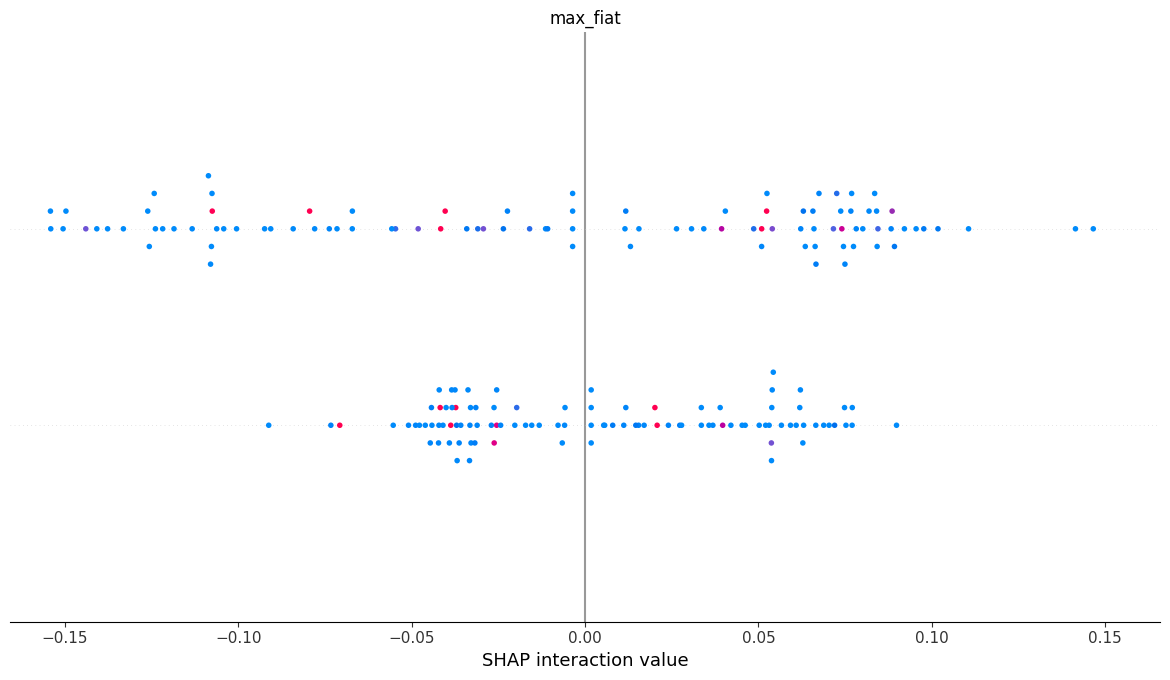

In [30]:
shap.summary_plot(shap_values, pd.DataFrame(subset, columns=X.columns))

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap

if isinstance(subset, np.ndarray):
    subset = pd.DataFrame(subset, columns=X_train.columns if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(subset.shape[1])])
else:
    subset = subset.iloc[:100].copy()  

explainer = shap.Explainer(final_model, X_train)
shap_values = explainer(subset, check_additivity=False)

if isinstance(shap_values, list):
    shap_values_class1 = shap_values[1]
else:
    shap_values_class1 = shap_values.values[:, :, 1] 

# Verify shapes
print("Subset shape:", subset.shape)
print("SHAP values shape (class 1):", shap_values_class1.shape)

# 1. SHAP Beeswarm Summary Plot
plt.figure()
shap.summary_plot(shap_values_class1, subset, show=False)
plt.title("SHAP Beeswarm Plot for VPN Classification")
plt.tight_layout()
plt.savefig('shap_summary_beeswarm.png')
plt.close()

# 2. SHAP Bar Summary Plot
plt.figure()
shap.summary_plot(shap_values_class1, subset, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Bar) for VPN Classification")
plt.tight_layout()
plt.savefig('shap_summary_bar.png')
plt.close()

# 3. Identify the top feature
mean_abs_shap = np.abs(shap_values_class1).mean(axis=0)
top_feature = subset.columns[np.argmax(mean_abs_shap)]

# 4. SHAP Dependence Plot for top feature
plt.figure()
shap.dependence_plot(
    top_feature,
    shap_values_class1,
    subset,
    interaction_index=None,
    show=False
)
plt.title(f"SHAP Dependence Plot for {top_feature}")
plt.tight_layout()
plt.savefig('shap_dependence.png')
plt.close()

# 5. (Optional) SHAP Force Plot for a single sample
plt.figure()
shap.force_plot(
    explainer.expected_value[1],  # Expected value for class 1 (VPN)
    shap_values_class1[0],  # SHAP values for first sample
    subset.iloc[0],  # Feature values for first sample
    show=False,
    matplotlib=True
)
plt.title("SHAP Force Plot for First Sample (VPN Classification)")
plt.tight_layout()
plt.savefig('shap_force_plot_sample.png')
plt.close()

# 6. Feature importance ranking
shap_importance = pd.DataFrame({
    'feature': subset.columns,
    'importance': mean_abs_shap
}).sort_values(by='importance', ascending=False)

print("\nTop 5 Most Important Features (SHAP):")
print(shap_importance.head())

# 7. Insights
print("\nInsights from SHAP Analysis:")
print("- The SHAP beeswarm plot shows how feature values impact VPN predictions (red = high values, blue = low values).")
print("- The bar plot ranks features by their average impact on model output.")
print(f"- The top feature ({top_feature}) has the greatest influence on distinguishing VPN vs. Non-VPN.")
print(f"- The dependence plot for {top_feature} shows its relationship with VPN predictions.")
print("- Positive SHAP values push predictions toward VPN; negative values toward Non-VPN.")

 96%|=================== | 191/200 [00:17<00:00]       

Subset shape: (100, 15)
SHAP values shape (class 1): (100, 15)

Top 5 Most Important Features (SHAP):
               feature  importance
2          min_flowiat    0.051441
5          max_flowiat    0.050026
13         std_flowiat    0.048930
10  flowBytesPerSecond    0.044248
0             max_fiat    0.038601

Insights from SHAP Analysis:
- The SHAP beeswarm plot shows how feature values impact VPN predictions (red = high values, blue = low values).
- The bar plot ranks features by their average impact on model output.
- The top feature (min_flowiat) has the greatest influence on distinguishing VPN vs. Non-VPN.
- The dependence plot for min_flowiat shows its relationship with VPN predictions.
- Positive SHAP values push predictions toward VPN; negative values toward Non-VPN.


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [48]:
top_features = ['min_flowiat', 'max_flowiat', 'std_flowiat', 'flowBytesPerSecond', 'max_fiat']
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]
final_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
final_model.fit(X_train_top, y_train)
accuracy = final_model.score(X_test_top, y_test)
print(f"Model Accuracy with Top Features: {accuracy:.4f}")

Model Accuracy with Top Features: 0.9644


Benefits:
Faster training and prediction for real-time applications.
Reduced risk of overfitting by focusing on the most relevant features.

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(final_model, X_train_top, y_train, cv=5, scoring='f1')
print(f"Cross-Validation F1 Scores: {scores.mean():.4f} (+/- {scores.std():.4f})")

Cross-Validation F1 Scores: 0.9618 (+/- 0.0017)


Interpreting the Output
F1-Score (0.9618): The F1-score, which is the harmonic mean of precision and recall, indicates that your model is highly effective at correctly classifying both VPN and Non-VPN traffic. A score close to 1.0 suggests minimal false positives and false negatives.
Standard Deviation (0.0017): The low standard deviation across the 5 folds shows that the model’s performance is stable and not overly sensitive to variations in the training data splits. This suggests good generalizability within the ISCXVPN2016 dataset.
Context: The model uses a reduced feature set based on SHAP analysis, focusing on timing and flow features (min_flowiat, etc.), which are critical for distinguishing VPN traffic (consistent, tunneled behavior) from Non-VPN traffic (variable, human-like behavior).

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = final_model.predict(X_test_top)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Set Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-VPN', 'VPN'])
disp.plot()
plt.title("Confusion Matrix for VPN Classification")
plt.savefig('confusion_matrix.png')
plt.close()

Test Set Metrics:
Accuracy: 0.9644
Precision: 0.9520
Recall: 0.9818
F1-Score: 0.9667


In [51]:
print("Test set class distribution:", y_test.value_counts())

Test set class distribution: 1    6586
0    5957
Name: class1, dtype: int64


In [52]:
import pickle

# Save the model
model_filename = 'vpn_classifier_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(final_model, file)
print(f"Model saved as: {model_filename}")

# Save the scaler (assuming StandardScaler was used)
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)
print(f"Scaler saved as: {scaler_filename}")

# Save the label encoder (assuming LabelEncoder was used for class1)
label_encoder_filename = 'label_encoder.pkl'
with open(label_encoder_filename, 'wb') as file:
    pickle.dump(le, file)
print(f"Label encoder saved as: {label_encoder_filename}")

# Save the feature names
feature_filename = 'top_features.txt'
with open(feature_filename, 'w') as file:
    file.write('\n'.join(X_test_top.columns))
print(f"Top features saved as: {feature_filename}")

Model saved as: vpn_classifier_model.pkl
Scaler saved as: scaler.pkl
Label encoder saved as: label_encoder.pkl
Top features saved as: top_features.txt
